In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [13]:
def synthetic_data(w, b, num_examples):
    """ 生成y=Xw+b+噪声 """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print(f'features:{features}\nlabels:{labels}')

features:tensor([[-4.6672e-01,  5.6685e-01],
        [ 1.5645e-01,  8.4012e-01],
        [ 1.1232e+00, -2.5125e-01],
        ...,
        [ 3.4623e-01,  7.7241e-01],
        [ 2.7550e-04,  1.8581e-01],
        [ 1.0040e+00,  5.4051e-01]])
labels:tensor([[ 1.3344e+00],
        [ 1.6736e+00],
        [ 7.2896e+00],
        [ 2.1760e-01],
        [-2.5727e+00],
        [ 6.8672e+00],
        [ 3.7880e+00],
        [ 5.3777e+00],
        [ 1.9627e+00],
        [ 8.5291e+00],
        [ 6.5991e+00],
        [ 4.1996e+00],
        [-3.7230e+00],
        [ 7.1063e+00],
        [-4.5903e+00],
        [ 4.0290e-01],
        [ 7.3539e+00],
        [ 1.9700e+00],
        [ 5.6983e-01],
        [ 8.2859e+00],
        [ 1.4410e+00],
        [ 2.2910e+00],
        [ 9.6117e-01],
        [-2.4655e-01],
        [ 5.9361e+00],
        [ 1.1194e+01],
        [ 4.2928e+00],
        [ 2.6713e+00],
        [ 8.0952e+00],
        [ 1.0442e+01],
        [ 3.7735e+00],
        [ 5.0412e+00],
        [ 7.9401e-

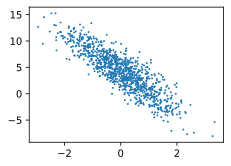

In [14]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(labels)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i + batch_size, num_examples)]
    yield features[batch_indices], labels[batch_indices]

In [27]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0852,  0.2583],
        [-1.4479,  0.3346],
        [-1.3620, -0.6404],
        [ 0.4119,  0.1699],
        [-1.7529,  0.8158],
        [ 0.7742,  0.6833],
        [ 1.1777, -1.4380],
        [-1.5426,  0.6884],
        [ 1.0678,  0.1657],
        [ 0.7374, -0.0394]]) 
 tensor([[ 5.4970],
        [ 0.1513],
        [ 3.6449],
        [ 4.4484],
        [-2.0839],
        [ 3.4298],
        [11.4463],
        [-1.2269],
        [ 5.7834],
        [ 5.8070]])


In [29]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [30]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [41]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [42]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [43]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 4.931756
epoch 2, loss 4.592948
epoch 3, loss 4.390378


In [44]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.9289, -1.8300], grad_fn=<SubBackward0>)
b的估计误差: tensor([2.1769], grad_fn=<RsubBackward1>)
